In [ ]:
# 확률분포

# 동전을 던져 나올수 있는 경우의 확률분포
# 앞 1/2, 뒤 1/2

# 동전을 두번 던져 나올수 있는 경우의 확률 분포
# (앞, 앞) (앞, 뒤) (뒤, 앞) (뒤, 뒤)
#   1/4     1/4       1/4      1/4     
#   1/4           2/4          1/4

In [30]:
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))

def dist_np(p1, p2): #  [3,10]  [5,25]
    return math.sqrt(sum((p2-p1)**2))

def process_product_names(s):
    r = []
    remove_after = ['(', ' 외', ' 외']
    split_at = ['+', ',']
    for c in remove_after:
        if c in s:
            s = s[:s.index(c)]
        
    for c in split_at:
        if c in s:
            r = r + s.split(c)
            
    if len(r) == 0:
        r.append(s)
    
    return r

# sample1 = 'productA+productB'
# sample2 = 'productA,productB'
# sample3 = 'product(A+B)'
# sample4 = 'product 외 abc'
# sample5 = 'product'

# print(process_product_names(sample1)) #['productA', 'productB']
# print(process_product_names(sample2))
# print(process_product_names(sample3))
# print(process_product_names(sample4))
# print(process_product_names(sample5))

def fact(n):
    ret = 1
    while n>1:
        ret *= n
        n -= 1
    return ret

def fact_r(n):
    if n==2:
        return n
    return fact_r(n-1)*n

def perm_f(n, r):
    return fact(n)/fact(n-r)

def combi_f(n, r):
    return fact(n)/(fact(n-r)*fact(r))

def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r    

def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f

def normal(x, mu=0, sigma=1):
    return (1/np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(((x-mu)/sigma)**2))

(4, [[1, 1], [0, 1], [1, 0], [0, 0]])
[[1 1]
 [0 1]
 [1 0]
 [0 0]]
[1 1]
[0.25 0.5  0.25]


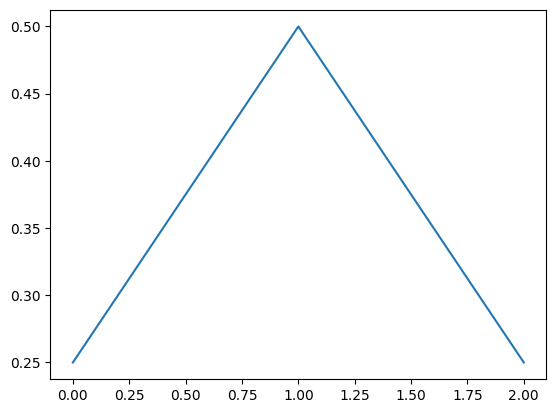

In [5]:
x = count_with_replacement_order([1,0], 2)
print(x)
x_array = np.array(x[1])
print(x_array)
x_array1 = np.sum(x_array, axis=1)
x_array2 = np.unique(x_array1, return_counts=True)
print(x_array[0])
print(x_array2[1]/len(x_array1))

_, axe = plt.subplots()
axe.plot(x_array2[0], x_array2[1]/len(x_array1))

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1],
      dtype=int64))


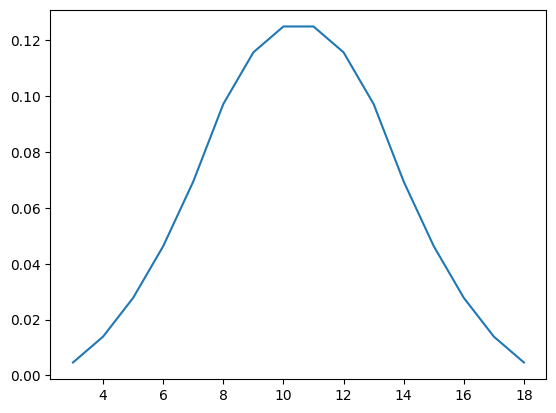

In [13]:
# [주사위를 3번던져 나온 숫자의 합]의 확률분포
tot, counts = count_with_replacement_order([x for x in range(1, 7)], 3)
# print(tot)
# print(counts)

counts_np = np.array(counts)
pass1 = np.sum(counts_np, axis=1)
pass2 = np.unique(pass1, return_counts=True)
print(pass2)

_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1] / tot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1], dtype=int64))


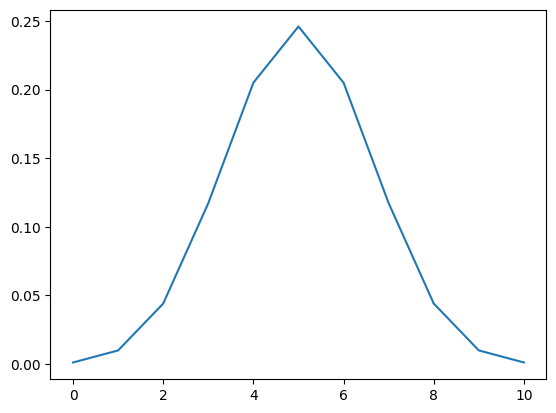

In [15]:
# 동전을 10번 던져(앞1, 뒤0) 나올수 있는 합의 분포
tot, counts = count_with_replacement_order([1, 0], 10)
# print(tot)
# print(counts)

counts_np = np.array(counts)
pass1 = np.sum(counts_np, axis=1)
pass2 = np.unique(pass1, return_counts=True)
print(pass2)

_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1] / tot)

In [18]:
# 동전을 던져, 앞면이 나오면 100원을 주고,
# 뒷면이 나오면 100원을 받기로 함.

#앞면이 8번 나옴.

count2 = pass2[1]
print(count2)
print(np.sum(count2[-3:])/tot) #<-- p-value

#만약 p-value가 합의한 유의수준 5%보다 클 경우,
#발상 가능한 일반적인 케이스이므로
# 귀무가설을 수용,
#만약 p-value가 합의한 유의수준 5%보다 작을 경우,
#희귀한 케이스에 속하므로
# 귀무가설을 기각, 대립가설을 채택

[  1  10  45 120 210 252 210 120  45  10   1]
0.0546875


값: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30] 확률: [0.0001286  0.000643   0.00192901 0.00450103 0.00900206 0.0162037
 0.02636317 0.03922325 0.05401235 0.06944444 0.08371914 0.0945216
 0.10030864 0.10030864 0.0945216  0.08371914 0.06944444 0.05401235
 0.03922325 0.02636317 0.0162037  0.00900206 0.00450103 0.00192901
 0.000643   0.0001286 ]
25 필터: [25]
확률: [0.0162037]
25보다 큰것: [26 27 28 29 30]
확률: [0.00900206 0.00450103 0.00192901 0.000643   0.0001286 ]
합: 0.016203703703703703


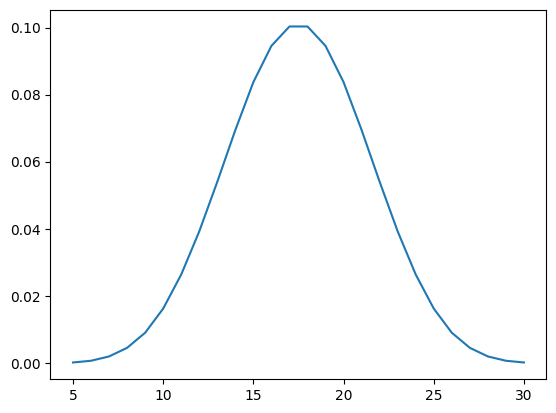

In [37]:
#주사위를 5번 던졌을때,
# - 합이 25가 될 확률
# - 합이 25보다 크면, 100원을 받기로 하였다. 합이 25보다 클 확률은? (25는 불포함)

tot, counts = count_with_replacement_order([x for x in range(1, 7)], 5)
counts_np = np.array(counts)
pass1 = np.sum(counts_np, axis=1)
pass2 = np.unique(pass1, return_counts=True)
#print(pass2)
prob = pass2[1]/tot
v = pass2[0]
prob = pass2[1]/tot
print('값:', v, '확률:', prob)
assert np.sum(prob)==1.0

index_25 = v==25
print('25 필터:', v[index_25])
print('확률:', prob[index_25])

index_25H = v>25
print('25보다 큰것:', v[index_25H])
print('확률:', prob[index_25H])
print('합:',np.sum(prob[index_25H]))

_, axe = plt.subplots()
axe.plot(v, prob)

17.5 3.8188130791298667


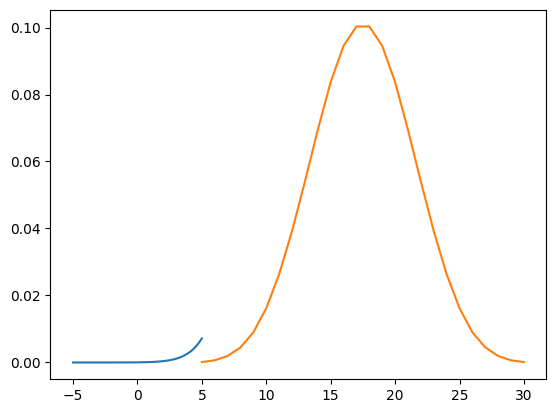

In [38]:
xs = np.linspace(-5,5, 100)
#xs = np.linspace(0,35, 100)
mu = np.mean(pass1)
sig = np.std(pass1)
print(mu, sig)

_, axe = plt.subplots()
axe.plot(xs, normal(xs, mu, sig))
axe.plot(v, prob)

